In [17]:
from libs.simple_hyper_tuner import quick_gridsearchcv_overview
from constants import target_name, x_path, y_path, x_test_path, y_test_path
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from libs.simple_processing import separate_target, split_train_test

X = pd.read_csv(x_path)
y = pd.read_csv(y_path)
Xt = pd.read_csv(x_test_path)
yt = pd.read_csv(y_test_path)

X_train, X_valid, y_train, y_valid = split_train_test(X, y, 0.75)

print(X.head())
print(y.head())


   bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0  0.090909    0.12500     0.067170  0.003108     0.0         0.0   0.0   
1  0.090909    0.28125     0.172075  0.004072     0.4         0.0   0.0   
2  0.060606    0.12500     0.036226  0.005743     0.0         0.0   0.0   
3  0.121212    0.37500     0.126038  0.002714     0.0         0.0   0.0   
4  0.090909    0.25000     0.104906  0.004579     0.0         0.0   0.0   

   condition     grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0        0.5  0.500000    0.097588       0.000000  0.478261      0.000000   
1        0.5  0.500000    0.206140       0.082988  0.443478      0.988089   
2        0.5  0.416667    0.052632       0.000000  0.286957      0.000000   
3        1.0  0.500000    0.083333       0.188797  0.565217      0.000000   
4        0.5  0.583333    0.152412       0.000000  0.756522      0.000000   

    zipcode       lat      long  sqft_living15  sqft_lot15  
0  0.893939  0.571498  0.

In [20]:
from sklearn.linear_model import LinearRegression, Lasso

model = Lasso()
model.fit(X_train,y_train)
score = model.score(X_valid,y_valid)

print("Score: ", score)

Score:  -0.001594121137025617


MAE: 0.034336805293625025


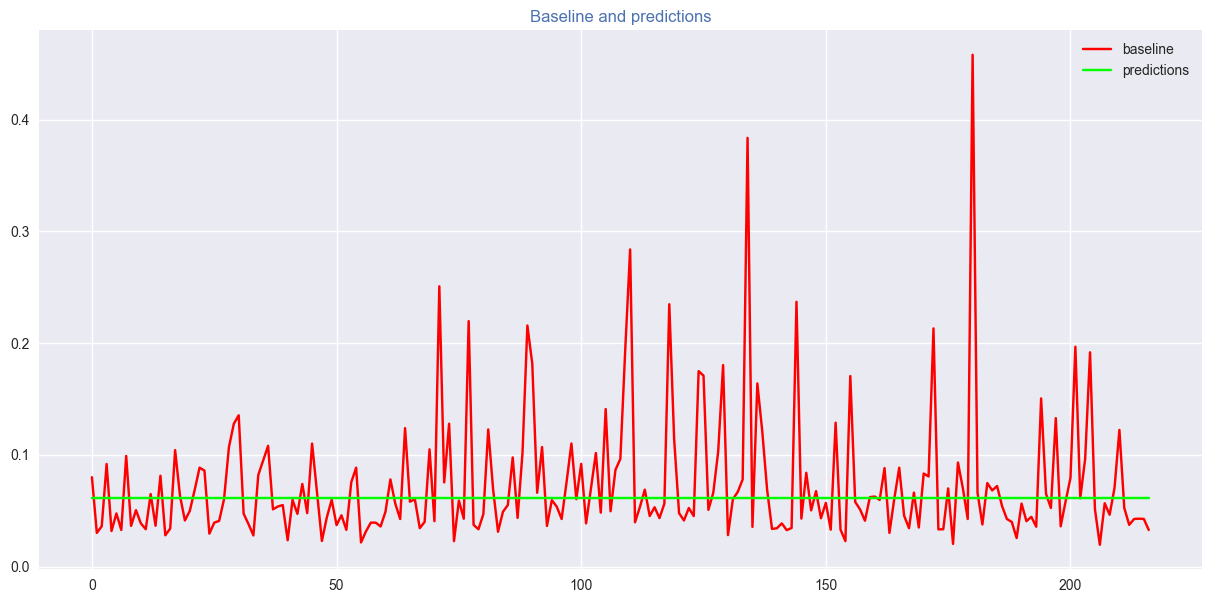

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import matplotlib as mpl

pred = model.predict(Xt)

print('MAE:', metrics.mean_absolute_error(yt, pred))

mpl.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(15, 7))
ax.set_title("Baseline and predictions", color='C0')
ax.plot(range(len(yt)), yt, color="#f00" , label="baseline")
ax.plot(range(len(pred)), pred, color="#0f0", label="predictions")
plt.legend()
